In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from scipy import stats 

import missingno as msno 
plt.style.use('seaborn') 

import warnings 
warnings.filterwarnings("ignore") 

mpl.rcParams['axes.unicode_minus'] = False 

%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv", parse_dates = ["datetime"]) 
df_test = pd.read_csv("test.csv", parse_dates = ["datetime"])

In [3]:
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour

df_test["year"] = df_test["datetime"].dt.year 
df_test["month"] = df_test["datetime"].dt.month 
df_test["day"] = df_test["datetime"].dt.day
df_test["hour"] = df_test["datetime"].dt.hour

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

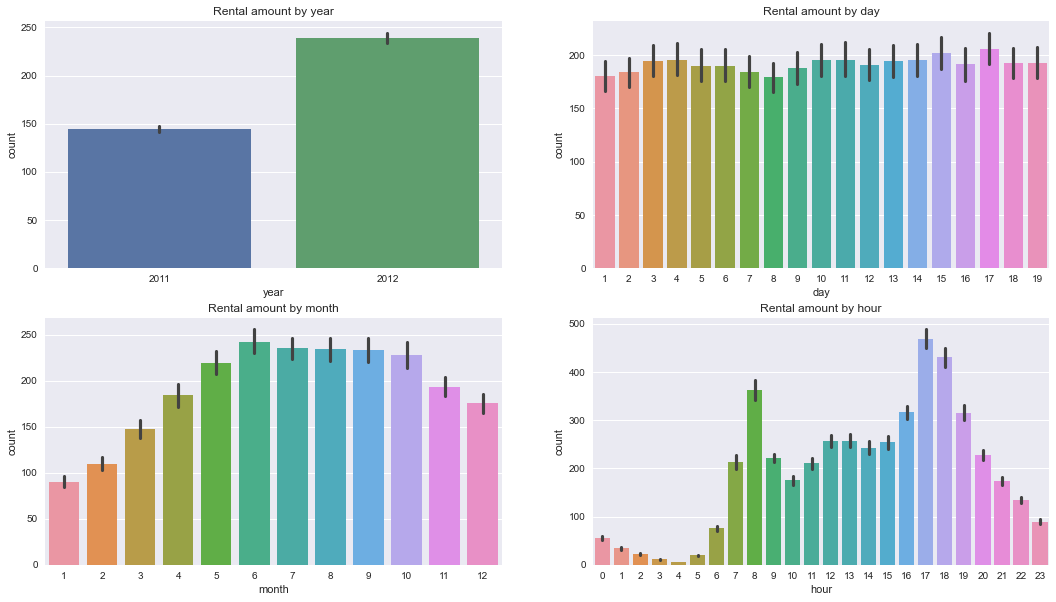

In [4]:
figure, ((ax1,ax3),(ax2,ax4)) = plt.subplots(nrows = 2, ncols = 2)
figure.set_size_inches(18,10)

sns.barplot(data=df_train, x = "year", y = "count", ax = ax1) 
sns.barplot(data=df_train, x = "month", y = "count", ax = ax2) 
sns.barplot(data=df_train, x = "day", y = "count", ax = ax3)
sns.barplot(data=df_train, x = "hour", y = "count", ax = ax4)

ax1.set(ylabel = "count", title = "Rental amount by year") 
ax2.set(ylabel = "count", title = "Rental amount by month") 
ax3.set(ylabel = "count", title = "Rental amount by day")
ax4.set(ylabel = "count", title = "Rental amount by hour")

In [5]:
df_train["dayofweek"] = df_train["datetime"].dt.dayofweek
df_test["dayofweek"] = df_test["datetime"].dt.dayofweek
#요일 변수 추가생성

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [7]:
df_train_wind_0 = df_train.loc[df_train['windspeed'] == 0]
df_train_wind_Not_0 = df_train.loc[df_train['windspeed'] != 0]

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
def predict_windspeed(data):
    data_Wind_0 = data.loc[data['windspeed'] == 0]
    data_Wind_Not_0 = data.loc[data['windspeed'] != 0]
    
    corr_windspeed = ['season', 'weather', 'day', 'temp', 'atemp', 'humidity']
    #풍속이 날씨에 대한 변수기 때문에 날씨에 관련된 변수들을 독립변수로 사용
    
    data_Wind_Not_0['windspeed'] = data_Wind_Not_0['windspeed'].astype('str')
    #data_wind_not_0 windspeed 타입을 str로 변환
    
    model = RandomForestClassifier()
    #n_estimator - 결정트리 수
    
    model.fit(data_Wind_Not_0[corr_windspeed], data_Wind_Not_0['windspeed'])
    #training data set 학습
    
    wind_predict = model.predict(data_Wind_0[corr_windspeed])
    
    predict_wind_0 = data_Wind_0
    predict_wind_not_0 = data_Wind_Not_0
    
    predict_wind_0['windspeed'] = wind_predict
    #windspeed = 0 인 값에 예측된 데이터 저장
    
    data = predict_wind_not_0.append(predict_wind_0)
    #predict_wind_not_0에 windspeed를 예측해서 채워 넣은 column을 추가
    
    data['windspeed'] = data['windspeed'].astype('float')
    #다시 float타입으로 변경
    data.reset_index(inplace = True)
    data.drop('index', inplace = True, axis = 1)
    
    return data
    
    

<AxesSubplot:title={'center':'train windspeed'}, xlabel='windspeed', ylabel='count'>

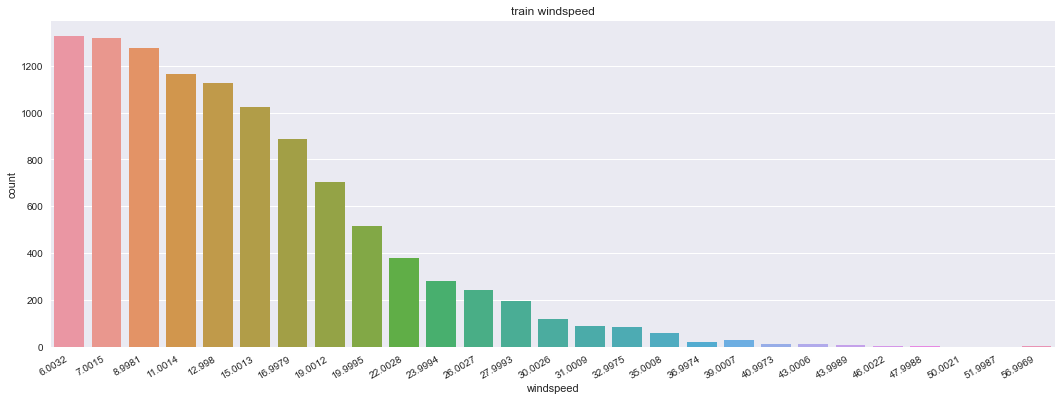

In [10]:
df_train = predict_windspeed(df_train)
df_test = predict_windspeed(df_test)

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='Count',title="train windspeed")
sns.countplot(data=df_train, x="windspeed", ax=ax1)

In [11]:
'''# 연속형 feature와 범주형 feature 
# 연속형 feature = ["temp","humidity","windspeed","atemp"]
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["season","holiday","workingday","weather",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    df_train[var] = df_train[var].astype('category')
    df_test[var] = df_test[var].astype('category')'''

'# 연속형 feature와 범주형 feature \n# 연속형 feature = ["temp","humidity","windspeed","atemp"]\n# 범주형 feature의 type을 category로 변경 해 준다.\ncategorical_feature_names = ["season","holiday","workingday","weather",\n                             "dayofweek","month","year","hour"]\n\nfor var in categorical_feature_names:\n    df_train[var] = df_train[var].astype(\'category\')\n    df_test[var] = df_test[var].astype(\'category\')'

In [12]:
feature_names = ['season','weather', 'temp', 'atemp', 'humidity', 'windspeed',
                 'year', 'hour', 'dayofweek', 'holiday', 'workingday']

In [13]:
X_train = df_train[feature_names]
X_test = df_test[feature_names]

In [14]:
X_test = df_test[feature_names]
X_test.head()

,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
2,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1
3,1,1,9.84,11.365,60,15.0013,2011,5,3,0,1
4,1,1,9.02,10.605,60,15.0013,2011,6,3,0,1


In [15]:
y_train = df_train['count']

In [16]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=5)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=5)

In [17]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=5)

In [18]:
prediction_rdf = model.predict(X_test)

print(prediction_rdf.shape)
prediction_rdf[0:20]

(6493,)


array([ 12.1 ,   3.59,   2.91,   6.87,  37.84, 105.86, 239.53, 134.9 ,
        63.31,  65.56,  76.91,  85.14,  88.7 ,  98.43, 203.78, 177.32,
       103.27,  71.8 ,  50.55,  46.43])

[Text(0.5, 1.0, 'test')]

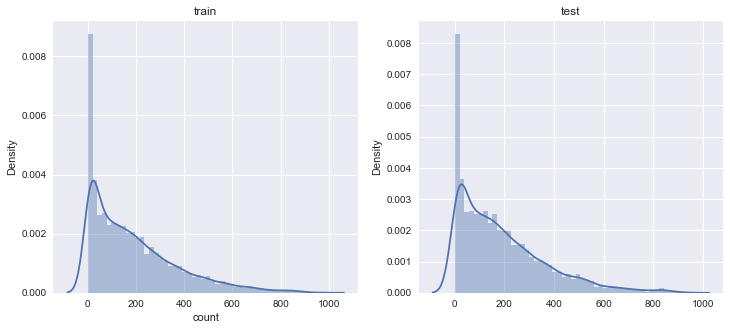

In [19]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(prediction_rdf,ax=ax2,bins=50)
ax2.set(title="test")

In [20]:
submission = pd.read_csv("sampleSubmission.csv")
submission

submission["count"] = prediction_rdf

print(submission.shape)
submission.head()
submission.to_csv('sampleSubmission.csv', index=False)

(6493, 2)


In [21]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,12.10
1,2011-01-20 01:00:00,3.59
2,2011-01-20 02:00:00,2.91
3,2011-01-20 03:00:00,6.87
4,2011-01-20 04:00:00,37.84
